In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = sns.load_dataset('iris')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
x=df[['sepal_length','sepal_width','petal_length']].iloc[:,[0,1,2]].values
y=df[['petal_width']].iloc[:,-1].values

In [5]:
#Train_Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
#Linear_regression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x)



In [13]:
r2=r2_score(y,y_predict)
print("R2_Score: ",r2)
mae=mean_absolute_error(y,y_predict)
print("Mean aboslute Error: ",mae)
mse=mean_squared_error(y,y_predict)
print("Mean squared Error: ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squraed Error: ",rmse)


R2_Score:  0.9375658275308473
Mean aboslute Error:  0.14288471379659476
Mean squared Error:  0.03603281432250925
Root Mean Squraed Error:  0.18982311324627793


In [14]:
poly = PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)
# Predict using polynomial regression
y_poly_pred = poly_model.predict(x_poly)
# Compare results


In [9]:
r2=r2_score(y,y_poly_pred)
print("R2_Score: ",r2)
mae=mean_absolute_error(y,y_poly_pred)
print("Mean aboslute Error: ",mae)
mse=mean_squared_error(y,y_poly_pred)
print("Mean squared Error: ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squraed Error: ",rmse)


R2_Score:  0.9570615125926563
Mean aboslute Error:  0.11761710077610156
Mean squared Error:  0.024781213281919477
Root Mean Squraed Error:  0.15742049829015115


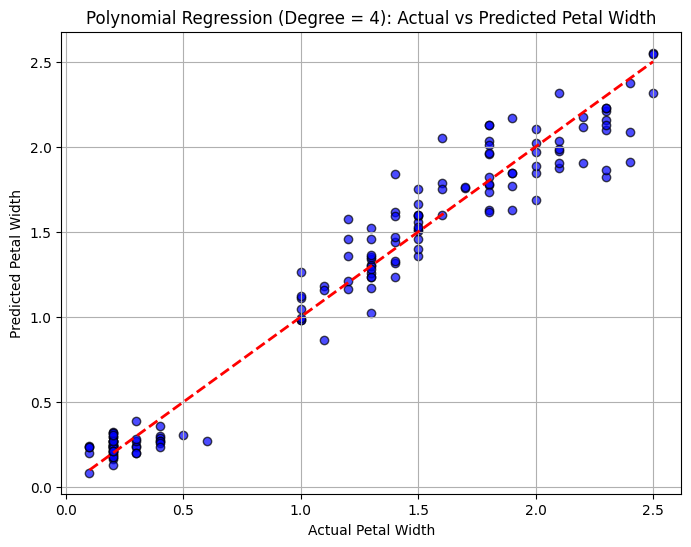

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_poly_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.title("Polynomial Regression (Degree = 4): Actual vs Predicted Petal Width")
plt.xlabel("Actual Petal Width")
plt.ylabel("Predicted Petal Width")
plt.grid(True)
plt.show()
